<a href="https://colab.research.google.com/github/zzozzo/Datathon/blob/main/ohjihoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제가 맡은 일에 대해 정리한 것들 입니다.

- 3D 산점도를 이용한 상관 관계 분석해서 가설을 성립, 인 사이트 도출
    - 나이 분류, 지역 분류, 성별 분류, 월 단위 분류
    - 3D 산점도 사용, 선 그래프 사용

- **날짜에 따른 지역별 확진자 수 현황**
    - 지역 분류, 성별, 나이 고려 할 것인지 정해야함. 월 단위로 할 건지 정해야함.
    - 선 그래프 사용

- **나이대 및 성별 누적 확진자수**
    - 성별, 나이 분류,
    - 월별 누적인지, 총 합 누적 값인지 정해야함.**`cumsum()`: 누적 합을 계산합니다.**
    - 선 그래프 사용



In [353]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
import pandas as pd

C_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Case.csv')
PI_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/PatientInfo.csv')
Pol_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Policy.csv')
R_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Region.csv')
ST_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SearchTrend.csv')
SF_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/SeoulFloating.csv')
T_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Time.csv')
TA_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeAge.csv')
TG_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeGender.csv')
TP_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/TimeProvince.csv')
W_df = pd.read_csv('/content/drive/MyDrive/aiffeldata/coviddb/Weather.csv')


In [396]:
TA_df

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


In [355]:
PI_df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [356]:
y = PI_df["age"]
x = PI_df["confirmed_date"]

In [357]:
y

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
5160    30s
5161    NaN
5162    NaN
5163    NaN
5164    NaN
Name: age, Length: 5165, dtype: object

In [358]:
y.value_counts()

20s     899
50s     667
30s     523
40s     518
60s     482
70s     232
10s     178
80s     170
0s       66
90s      49
100s      1
Name: age, dtype: int64

In [359]:
spd = PI_df.groupby(['age', 'confirmed_date'])
spd

In [360]:
PI_df.groupby('age').get_group('20s')


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
11,1000000012,male,20s,Korea,Seoul,etc,overseas inflow,NaN,0,NaN,2020-02-07,2020-02-27,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150,7000000005,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,20,NaN,2020-03-24,2020-05-08,NaN,released
5152,7000000007,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,26,NaN,2020-03-25,2020-04-03,NaN,released
5154,7000000009,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,14,NaN,2020-03-29,2020-04-28,NaN,released
5155,7000000010,female,20s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released


In [392]:
y = PI_df['age']
y

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
5160    30s
5161    NaN
5162    NaN
5163    NaN
5164    NaN
Name: age, Length: 5165, dtype: object

In [393]:
dp_g = pd.to_datetime(PI_df['confirmed_date'], format = '%Y-%m-%d')
x = dp_g

나이대 를 분류하고 확진 날짜를 기준으로 그래프를 출력한다.

In [363]:
## 데이터
import pandas as pd


TypeError: ignored

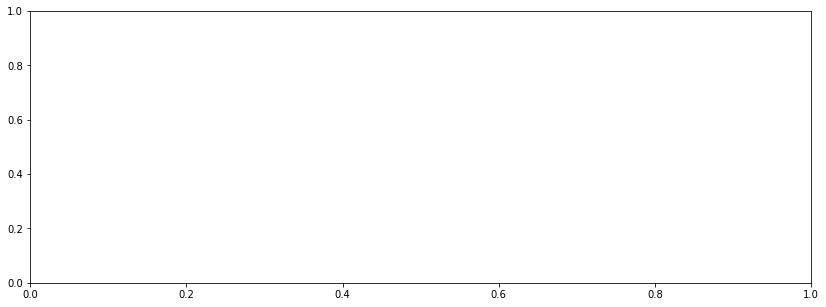

In [399]:

import matplotlib.pyplot as plt
y = PI_df['age']
x = PI_df['confirmed_date']

plt.rcParams["figure.figsize"] = (14,5)

plt.plot([x], y)

plt.show()

답을 못 찾고 있습니다...ㅠㅜ